In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [5 2 4 6 1 6 6 5 5 6]


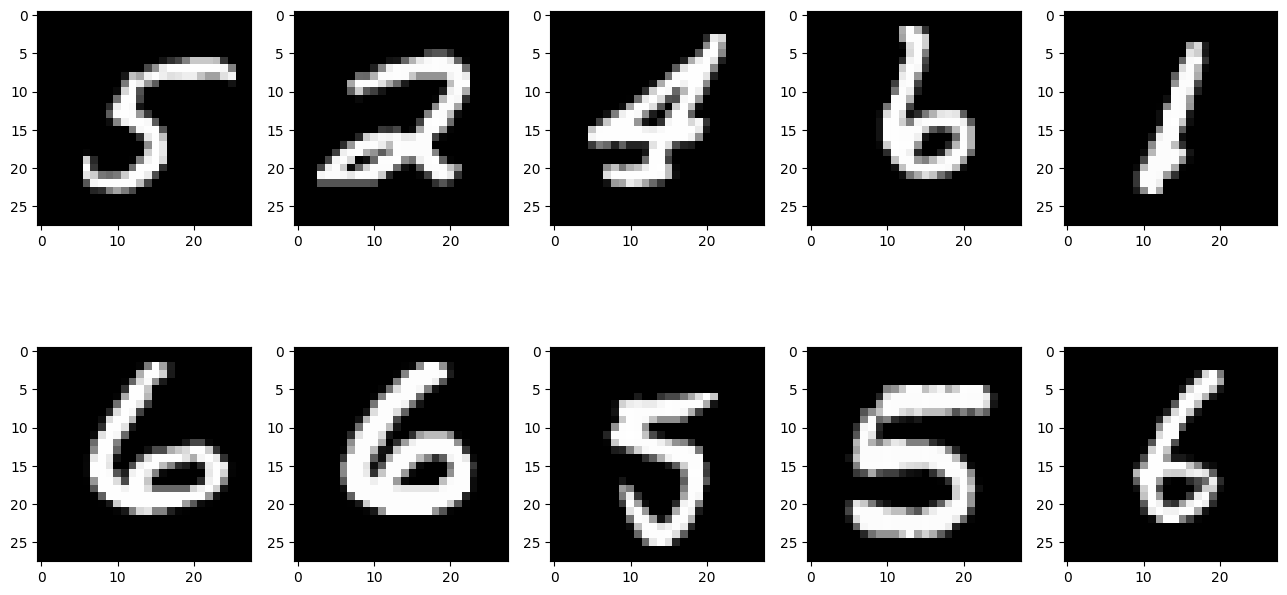

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8493 - loss: 0.5089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9609 - loss: 0.1257
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9714 - loss: 0.0919
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9787 - loss: 0.0669
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9819 - loss: 0.0566
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9855 - loss: 0.0467
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0411
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9886 - loss: 0.0338
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9909 - loss: 0.0281
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9910 - loss: 0.0280


Plot the loss and accuracy graphs

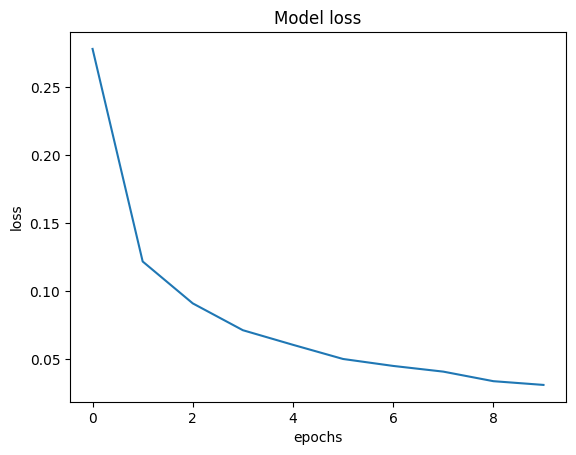

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

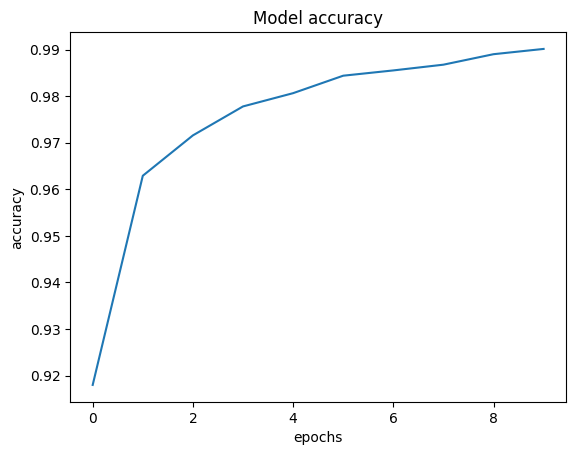

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.1185
Loss of the Test dataset is: 0.09883231669664383
Accuracy of the test dataset is: 0.9753999710083008


Save the model weights

In [14]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

### Question

1. Improve the test accuracy of the model by changing the hyperparameters.
2. Add L1 and L2 regularization terms to the model and retrain the model.
3. Visualize class-wise test dataset performance using a confusion matrix.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 - 15s - 10ms/step - accuracy: 0.7742 - loss: 2.8484 - val_accuracy: 0.8446 - val_loss: 1.3582
Epoch 2/10
1500/1500 - 12s - 8ms/step - accuracy: 0.8427 - loss: 1.3099 - val_accuracy: 0.8490 - val_loss: 1.2561
Epoch 3/10
1500/1500 - 12s - 8ms/step - accuracy: 0.8537 - loss: 1.2042 - val_accuracy: 0.8627 - val_loss: 1.1224
Epoch 4/10
1500/1500 - 8s - 5ms/step - accuracy: 0.8594 - loss: 1.1378 - val_accuracy: 0.8600 - val_loss: 1.0950
Epoch 5/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8627 - loss: 1.0969 - val_accuracy: 0.8747 - val_loss: 1.0594
Epoch 6/10
1500/1500 - 10s - 7ms/step - accuracy: 0.8654 - loss: 1.0713 - val_accuracy: 0.8816 - val_loss: 1.0210
Epoch 7/10
1500/1500 - 7s - 5ms/step - accuracy: 0.8668 - loss: 1.0473 - val_accuracy: 0.8722 - val_loss: 1.0171
Epoch 8/10
1500/1500 - 8s - 6ms/step - accuracy: 0.8677 - loss: 1.0304 - val_accuracy: 0.8687 - val_loss: 1.0051
Epoch 9/10
1500/1500 - 10s - 7ms/step - accuracy: 0.8699 - loss: 1.0146 - val_accuracy: 0.8

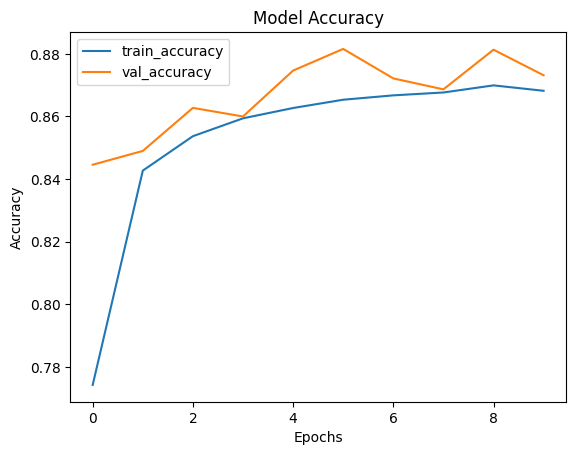

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


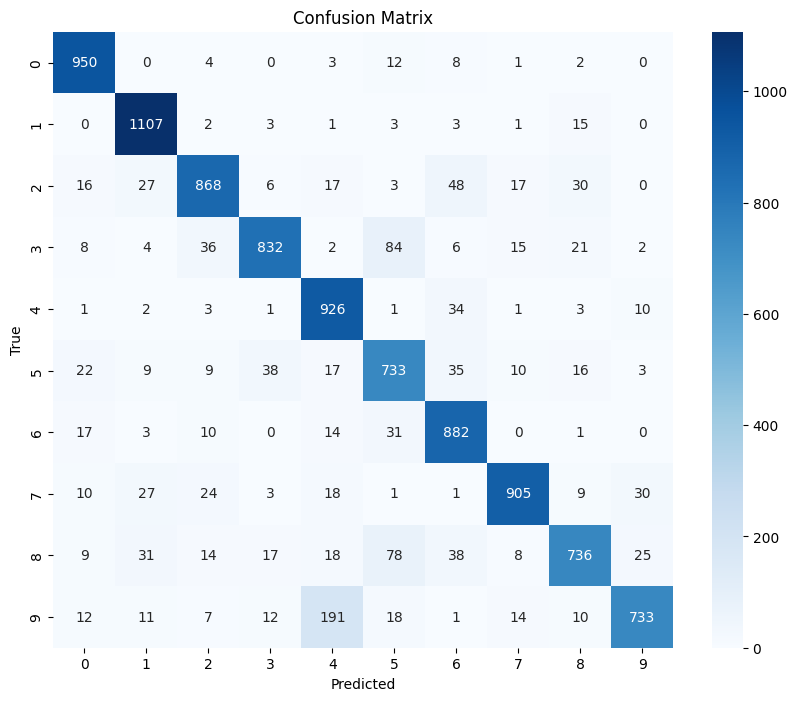

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Load MNIST dataset
(train_data, train_target), (test_data, test_target) = mnist.load_data()
train_data = train_data / 255.0
test_data = test_data / 255.0

# One-hot encode targets
train_target = to_categorical(train_target, 10)
test_target = to_categorical(test_target, 10)

# Build the model with L1 and L2 regularization
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_target, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_target, verbose=0)
print(f'Loss of the test dataset: {loss}')
print(f'Accuracy of the test dataset: {accuracy}')

# Plot the training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Confusion Matrix
predictions = model.predict(test_data)
conf_matrix = confusion_matrix(np.argmax(test_target, axis=1), np.argmax(predictions, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
